In [1]:
library('igraph')
library('Matrix')
library('pracma')

Warning message:
"package 'igraph' was built under R version 3.6.3"

Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union


Warning message:
"package 'Matrix' was built under R version 3.6.3"
Warning message:
"package 'pracma' was built under R version 3.6.3"

Attaching package: 'pracma'


The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu




#### a)

In [2]:
g_1000 <- barabasi.game(1000, m=1, directed=F);
is.connected(g_1000)

[1] TRUE

#### b)

IGRAPH clustering fast greedy, groups: 33, mod: 0.93
+ groups:
  $`1`
   [1]  32  56  93  99 102 104 128 139 160 167 169 197 222 254 331 341 355 364
  [19] 399 429 436 440 468 507 512 536 543 547 552 554 604 624 642 653 689 704
  [37] 760 804 808 867 925 957 960 973 996
  
  $`2`
   [1]   6   8  34  43  78  87 110 133 135 137 192 198 211 245 259 289 309 315
  [19] 326 329 330 346 427 450 463 472 477 497 515 538 557 581 592 600 646 648
  [37] 674 732 762 765 783 792 940
  
  + ... omitted several groups/vertices
---------------------------------------------------------------------------------
 The number of communities is: 33
 The modularity score of this partitioning is: 0.934245055866679

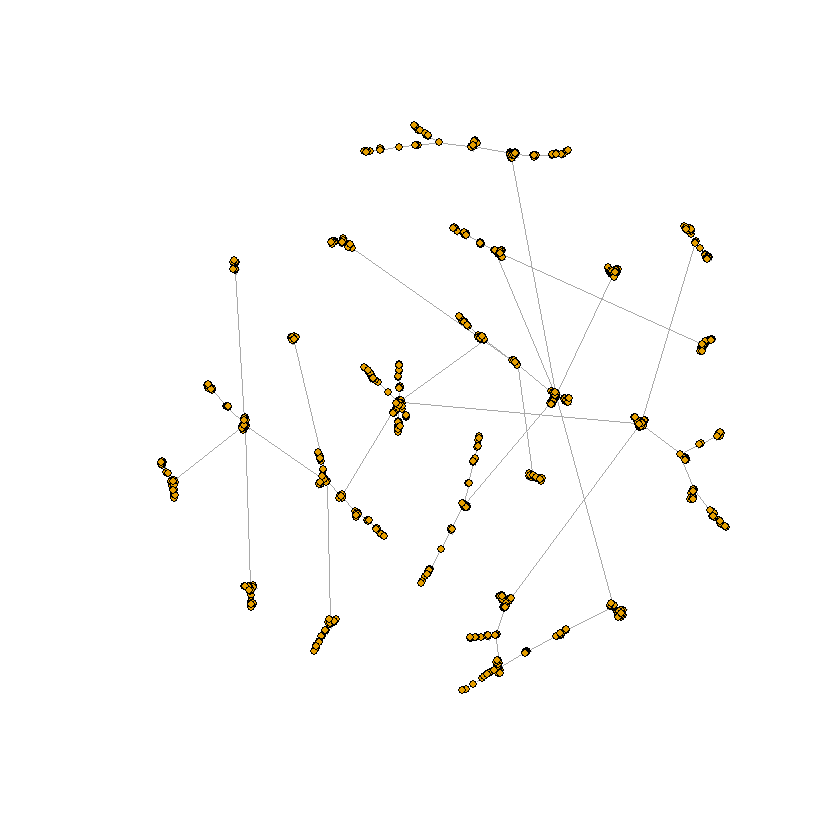

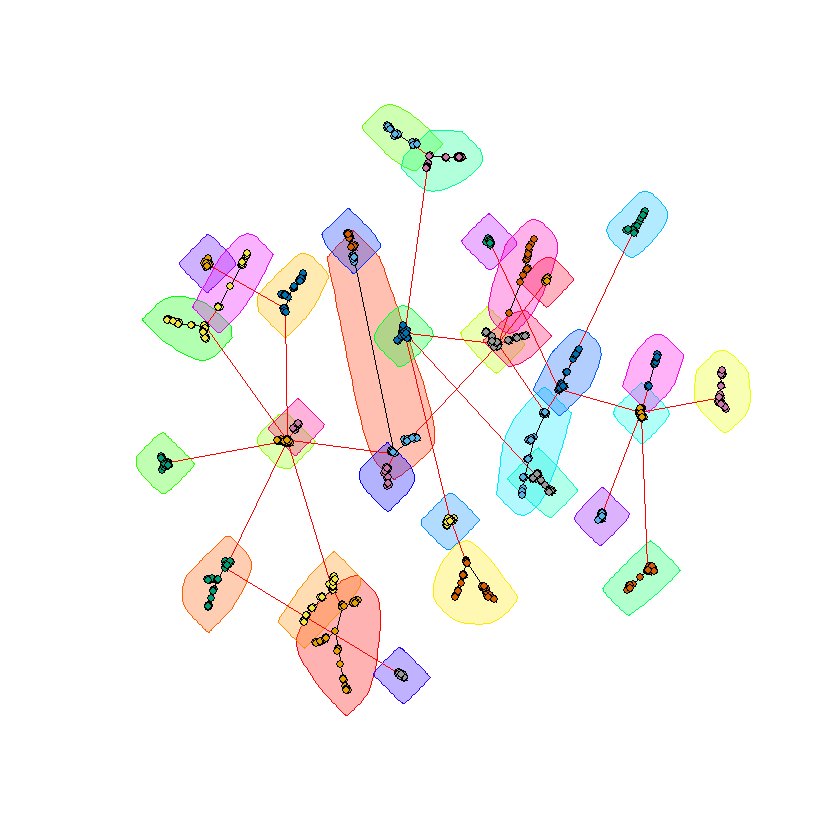

In [3]:
g_1000_comstr <- cluster_fast_greedy(g_1000)
print(g_1000_comstr)
cat('---------------------------------------------------------------------------------')
cat(paste('\n',"The number of communities is:",length(g_1000_comstr)))
cat(paste('\n',"The modularity score of this partitioning is:",modularity(g_1000_comstr)))
plot(g_1000,vertex.size=3,vertex.label=NA)
plot(g_1000_comstr, g_1000, vertex.size=3, vertex.label=NA)

#### c)

IGRAPH clustering fast greedy, groups: 114, mod: 0.98
+ groups:
  $`1`
    [1]   18  170  204  225  257  395  453  561  696  717  725  907 1053 1287
   [15] 1301 1342 1481 1489 1617 1818 2073 2074 2102 2113 2152 2258 2287 2336
   [29] 2346 2679 2797 2862 2981 3188 3260 3362 3389 3421 3427 3473 3492 3602
   [43] 3695 3766 3805 3837 3926 3941 3999 4045 4341 4377 4386 4418 4448 4521
   [57] 4618 4655 4709 4810 4821 4843 4957 4990 5199 5255 5340 5363 5442 5451
   [71] 5487 5543 5652 5663 5818 5851 5934 5984 6001 6024 6071 6243 6255 6258
   [85] 6280 6309 6682 6841 6846 6849 6885 6886 7064 7242 7296 7315 7366 7425
   [99] 7448 7471 7524 7532 7537 7547 7660 7662 7706 7751 7772 7778 7826 7892
  [113] 7969 8165 8171 8222 8246 8255 8270 8365 8398 8519 8569 8678 8718 8895
  + ... omitted several groups/vertices
---------------------------------------------------------------------------------
 The number of communities is: 114
 The modularity score of this partitioning is: 0.977557696763788

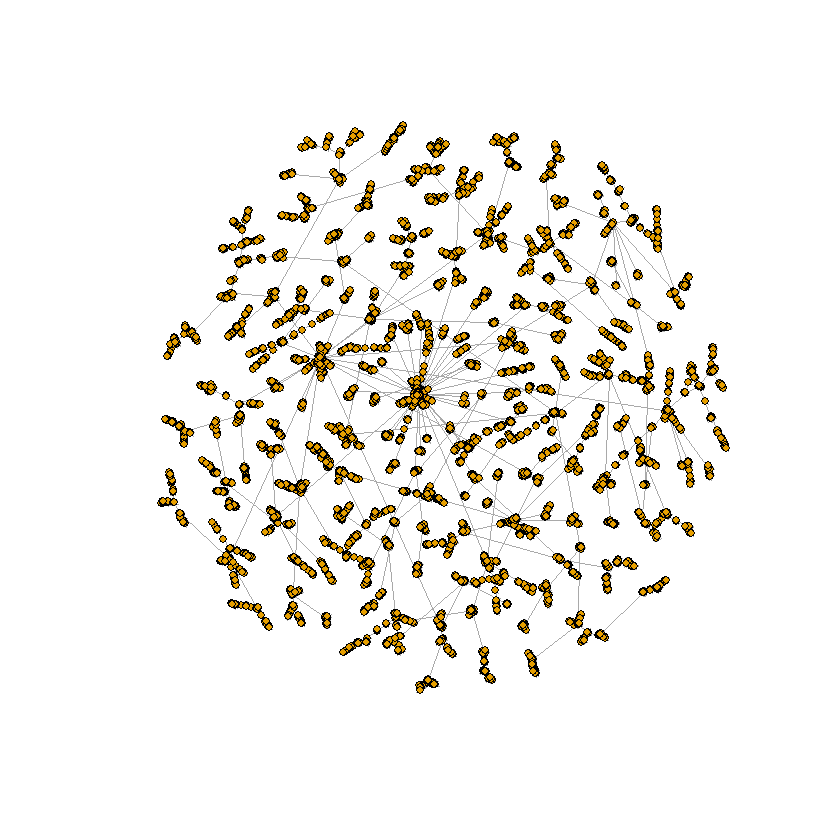

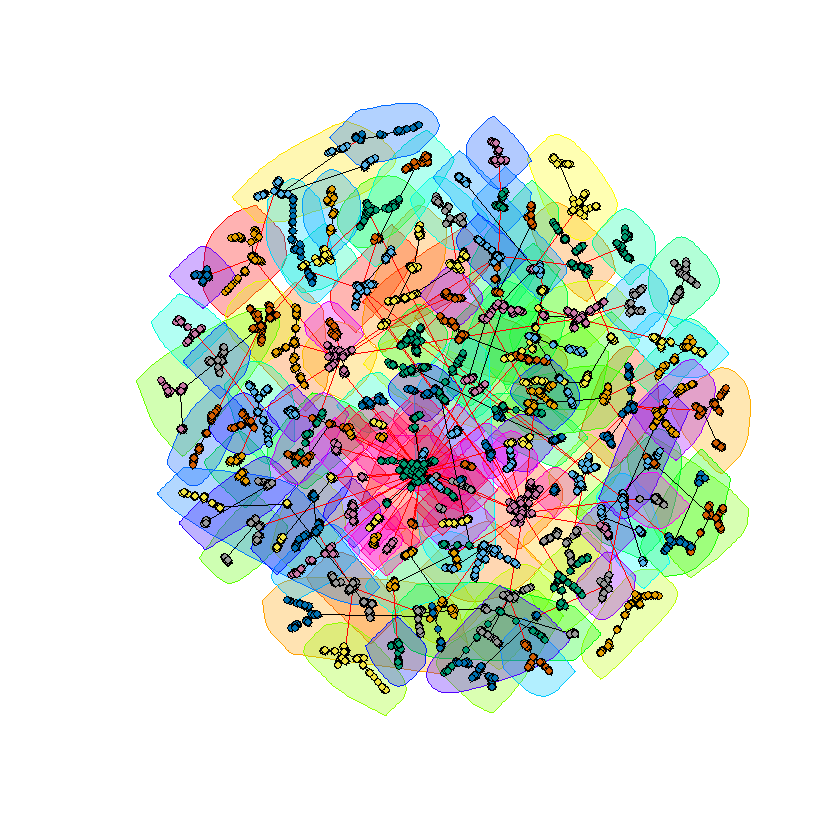

In [4]:
g_10000 <- barabasi.game(10000, m=1, directed=F);
g_10000_comstr <- cluster_fast_greedy(g_10000)
print(g_10000_comstr)
cat('---------------------------------------------------------------------------------')
cat(paste('\n',"The number of communities is:",length(g_10000_comstr)))
cat(paste('\n',"The modularity score of this partitioning is:",modularity(g_10000_comstr)))
plot(g_10000,vertex.size=3,vertex.label=NA)
plot(g_10000_comstr, g_10000, vertex.size=3, vertex.label=NA)

#### d)

Slope:  -2.242626

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"8 y values <= 0 omitted from logarithmic plot"


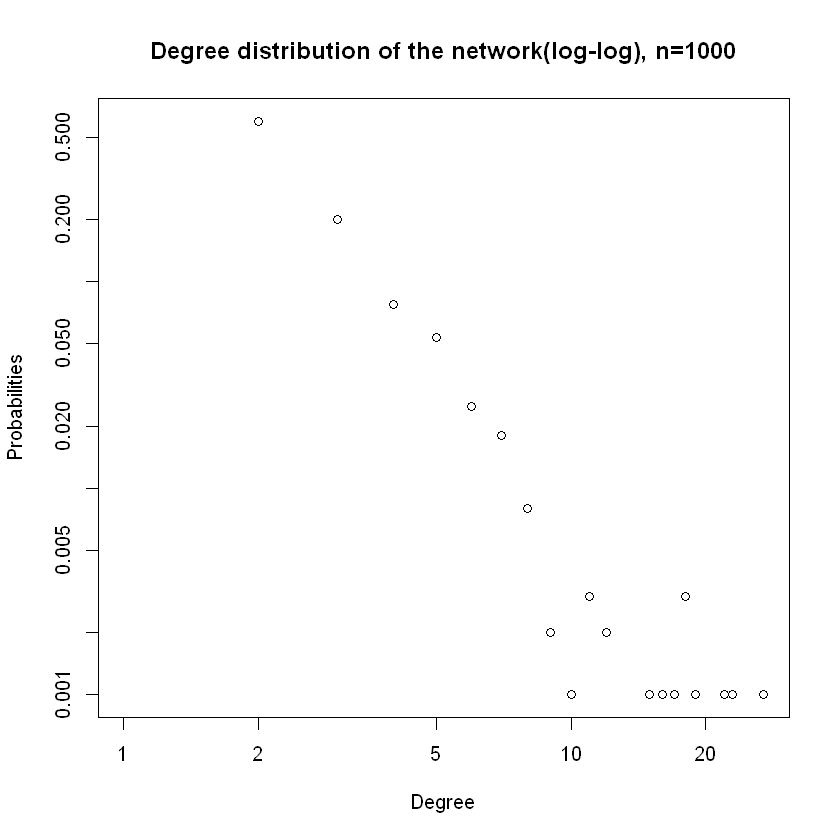

In [5]:
g_d = barabasi.game(n=1000, m=1, directed=FALSE)
    
log_degree = log(seq(1:max(degree(g_d))))
log_distribution = log(tail(degree.distribution(g_d), length(degree.distribution(g_d)) - 1)) # Remove degree 0
valid_idx = !is.infinite(log_degree) & !is.infinite(log_distribution) # Remove inf
log_degree = log_degree[valid_idx]
log_distribution = log_distribution[valid_idx]
    
cat("Slope: ", cov(log_degree, log_distribution) / var(log_degree))
plot(degree.distribution(g_d), log="xy", main="Degree distribution of the network(log-log), n=1000", xlab="Degree", ylab="Probabilities")

Slope:  -2.611911

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"22 y values <= 0 omitted from logarithmic plot"


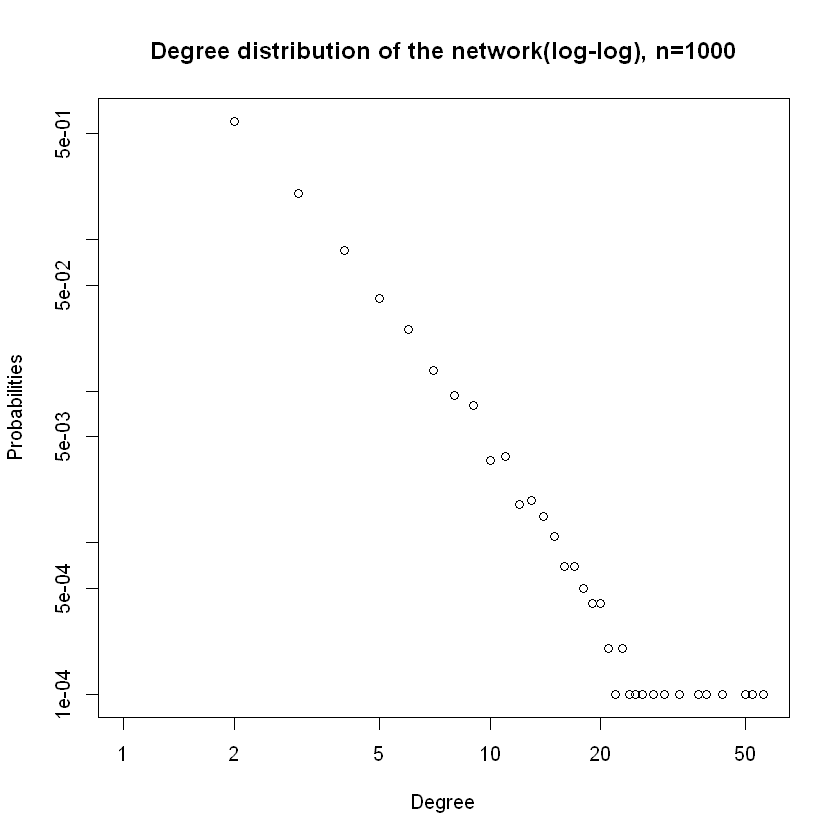

In [6]:
g_d_10000 = barabasi.game(n=10000, m=1, directed=FALSE)
    
log_degree = log(seq(1:max(degree(g_d_10000))))
log_distribution = log(tail(degree.distribution(g_d_10000), length(degree.distribution(g_d_10000)) - 1)) # Remove degree 0
valid_idx = !is.infinite(log_degree) & !is.infinite(log_distribution) # Remove inf
log_degree = log_degree[valid_idx]
log_distribution = log_distribution[valid_idx]
    
cat("Slope: ", cov(log_degree, log_distribution) / var(log_degree))
plot(degree.distribution(g_d_10000), log="xy", main="Degree distribution of the network(log-log), n=1000", xlab="Degree", ylab="Probabilities")

#### e)

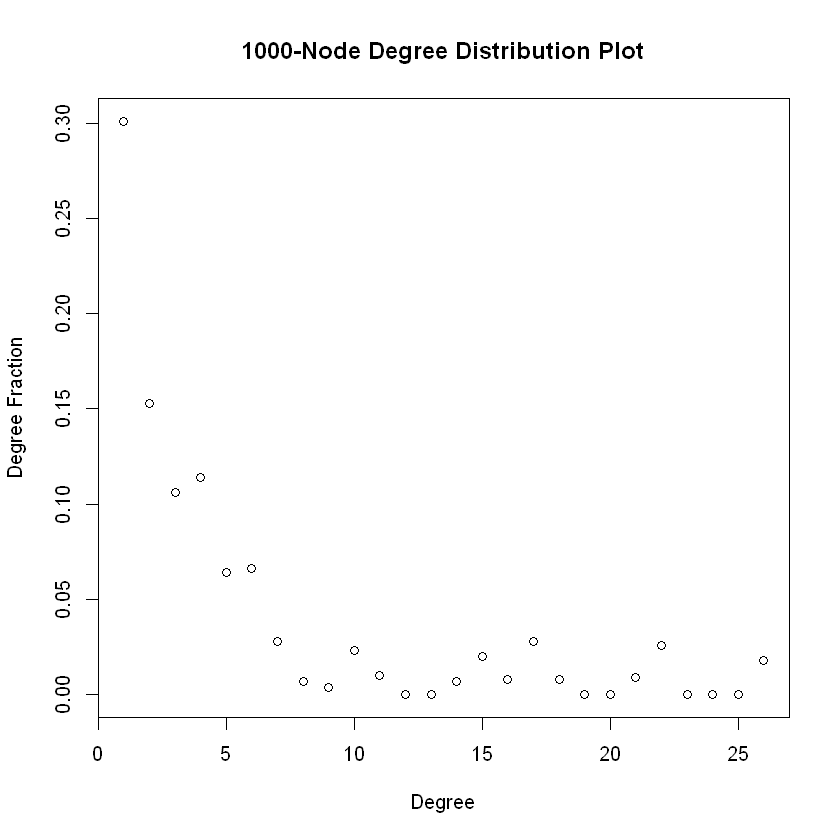

In [7]:
max_deg <- max(degree(g_d))
j_deg_freq <- c(rep(0,max_deg))

for (k in seq(1,1000)) {
    
    i_node <- sample(1:1000, 1)
    i_neighbors <- neighbors(g_d, i_node)
    
    j_node <- sample(i_neighbors, 1)
    
    j_deg_freq[degree(g_d, j_node)] <- j_deg_freq[degree(g_d, j_node)] + 1
}
j_deg_frac <- j_deg_freq / sum(j_deg_freq)
j_deg <- c(1:max_deg)
plot(x = j_deg, y = j_deg_frac, 
     main="1000-Node Degree Distribution Plot",
     xlab="Degree",ylab="Degree Fraction")


Call:
lm(formula = log_j_deg_frac ~ log_j_deg, na.action = na.exclude)

Coefficients:
(Intercept)    log_j_deg  
     -1.319       -1.100  



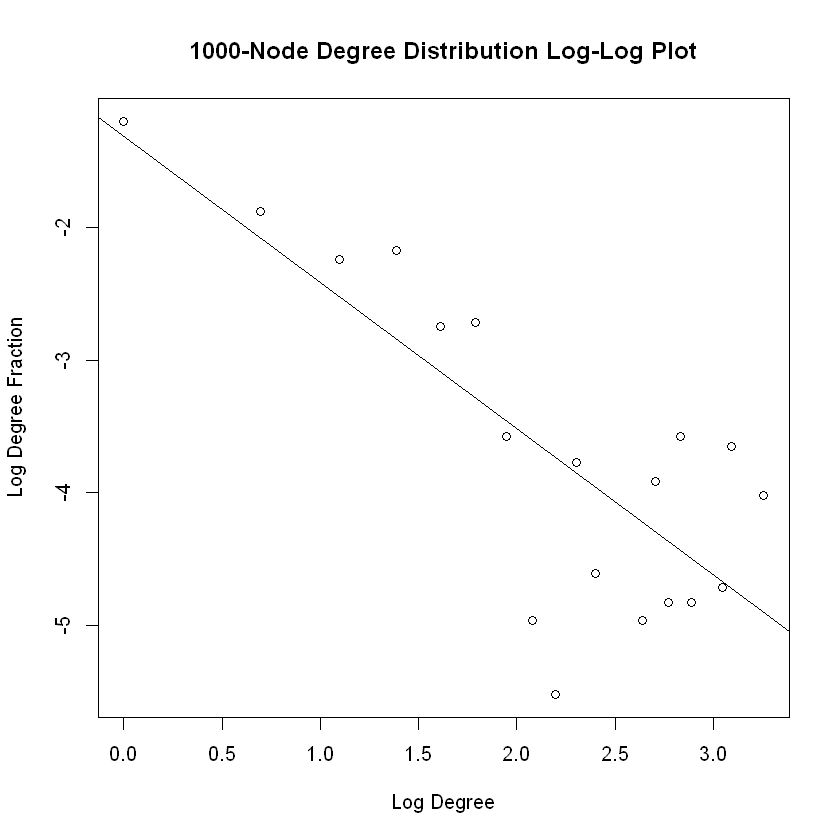

In [8]:
log_j_deg <- log(j_deg)
log_j_deg_frac <- log(j_deg_frac)
log_j_deg_frac[which(log_j_deg_frac == -Inf)] <- NA

# linear regression
reg_j_deg <- lm(log_j_deg_frac ~ log_j_deg, na.action = na.exclude)
print(reg_j_deg)

plot(x = log_j_deg, y = log_j_deg_frac, 
     main="1000-Node Degree Distribution Log-Log Plot",
     xlab="Log Degree",ylab="Log Degree Fraction") 
abline(reg_j_deg)

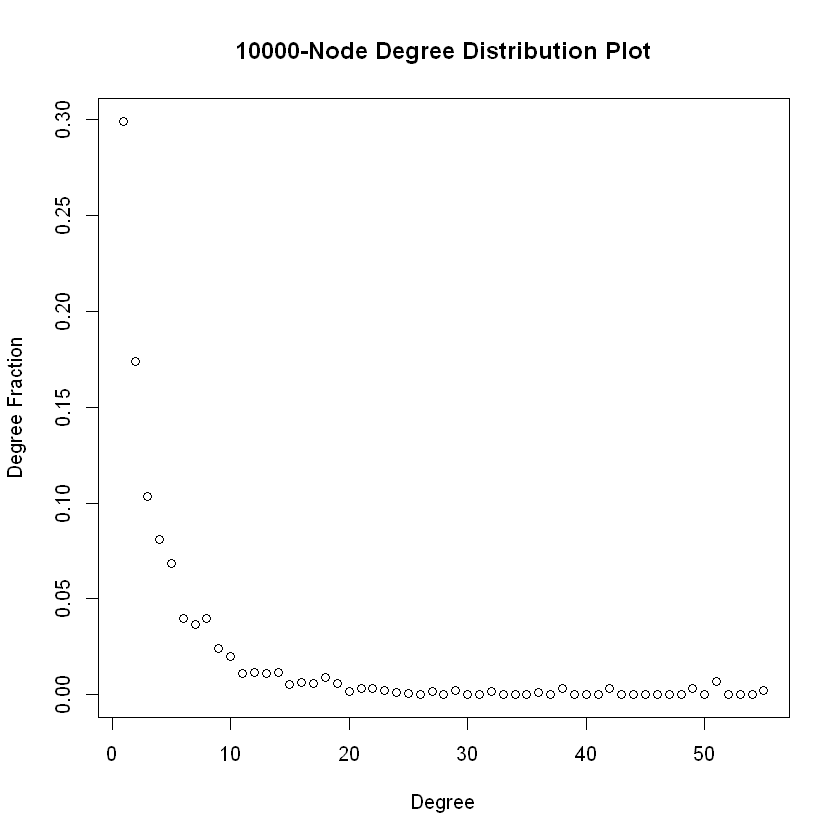

In [9]:
max_deg <- max(degree(g_d_10000))
j_deg_freq <- c(rep(0,max_deg))

for (k in seq(1,10000)) {
    
    i_node <- sample(1:10000, 1)
    i_neighbors <- neighbors(g_d_10000, i_node)
        j_node <- sample(i_neighbors, 1)
        j_deg_freq[degree(g_d_10000, j_node)] <- j_deg_freq[degree(g_d_10000, j_node)] + 1
}
j_deg_frac <- j_deg_freq / sum(j_deg_freq)
j_deg <- c(1:max_deg)
plot(x = j_deg, y = j_deg_frac, 
     main="10000-Node Degree Distribution Plot",
     xlab="Degree",ylab="Degree Fraction")


Call:
lm(formula = log_j_deg_frac ~ log_j_deg, na.action = na.exclude)

Coefficients:
(Intercept)    log_j_deg  
    -0.7661      -1.5141  



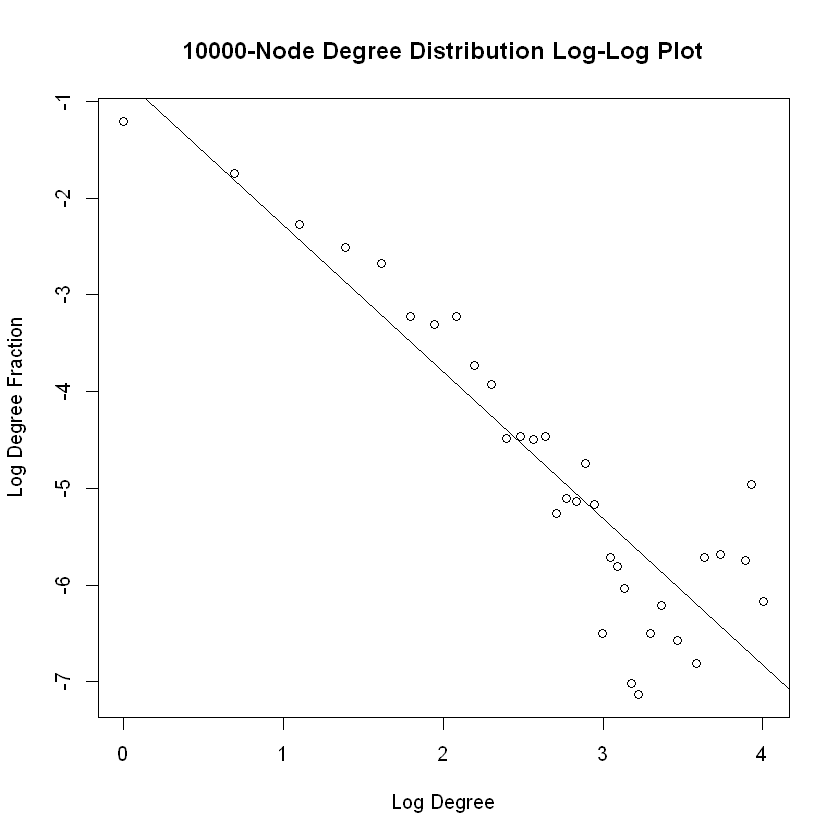

In [10]:
log_j_deg <- log(j_deg)
log_j_deg_frac <- log(j_deg_frac)
log_j_deg_frac[which(log_j_deg_frac == -Inf)] <- NA

# linear regression
reg_j_deg <- lm(log_j_deg_frac ~ log_j_deg, na.action = na.exclude)
print(reg_j_deg)

plot(x = log_j_deg, y = log_j_deg_frac, 
     main="10000-Node Degree Distribution Log-Log Plot",
     xlab="Log Degree",ylab="Log Degree Fraction") 
abline(reg_j_deg)

#### f)

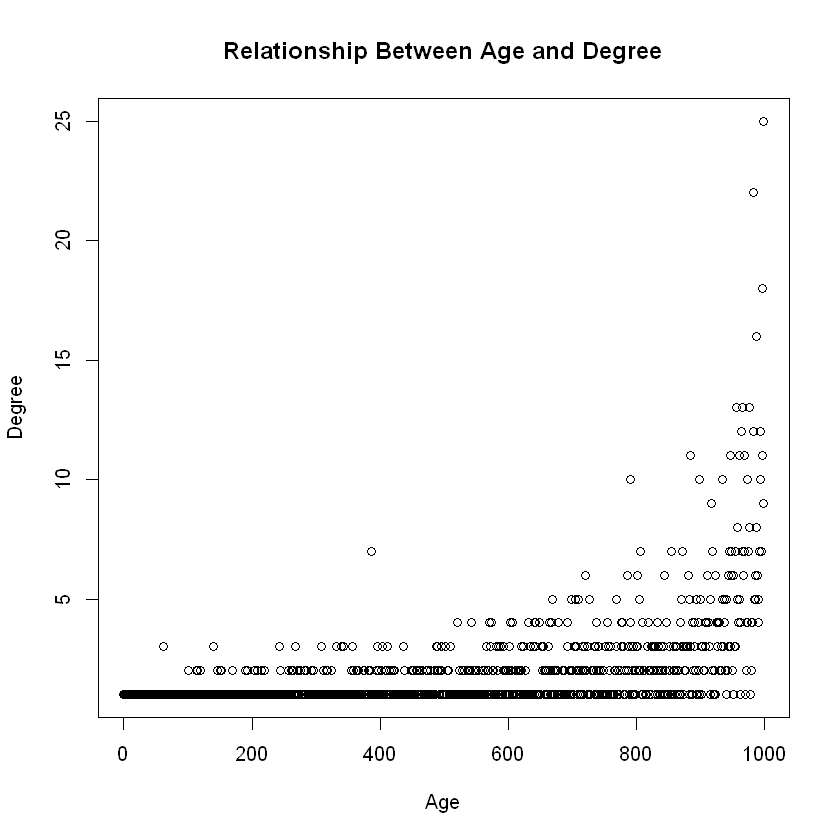

In [11]:
deg <- degree(g_1000)
age <- length(V(g_1000)) - V(g_1000)
plot(x = age, y = deg,
     main="Relationship Between Age and Degree",
     xlab="Age",ylab="Degree")

#### g)

##### n=1000, m=1, 2, 5

In [12]:
set.seed(0)
g_1000_m1 <- sample_pa(n = 1000, m = 1, directed = FALSE)
c_1000_m1 <- cluster_fast_greedy(g_1000_m1)
modularity(c_1000_m1)

[1] 0.9343257

In [13]:
set.seed(0)
g_1000_m2 <- sample_pa(n = 1000, m = 2, directed = FALSE)
c_1000_m2 <- cluster_fast_greedy(g_1000_m2)
modularity(c_1000_m2)

[1] 0.5226493

In [14]:
set.seed(0)
g_1000_m5 <- sample_pa(n = 1000, m = 5, directed = FALSE)
c_1000_m5 <- cluster_fast_greedy(g_1000_m5)
modularity(c_1000_m5)

[1] 0.2823105

##### n=10000, m=1, 2, 5

In [15]:
set.seed(0)
g_10000_m1 <- sample_pa(n = 10000, m = 1, directed = FALSE)
c_10000_m1 <- cluster_fast_greedy(g_10000_m1)
modularity(c_10000_m1)

[1] 0.9781674

In [16]:
set.seed(0)
g_10000_m1 <- sample_pa(n = 10000, m = 2, directed = FALSE)
c_10000_m1 <- cluster_fast_greedy(g_10000_m1)
modularity(c_10000_m1)

[1] 0.5300333

In [17]:
set.seed(0)
g_10000_m1 <- sample_pa(n = 10000, m = 5, directed = FALSE)
c_10000_m1 <- cluster_fast_greedy(g_10000_m1)
modularity(c_10000_m1)

[1] 0.2790432

#### h)

Origianl graph: 
Modularity =  0.934276117959804

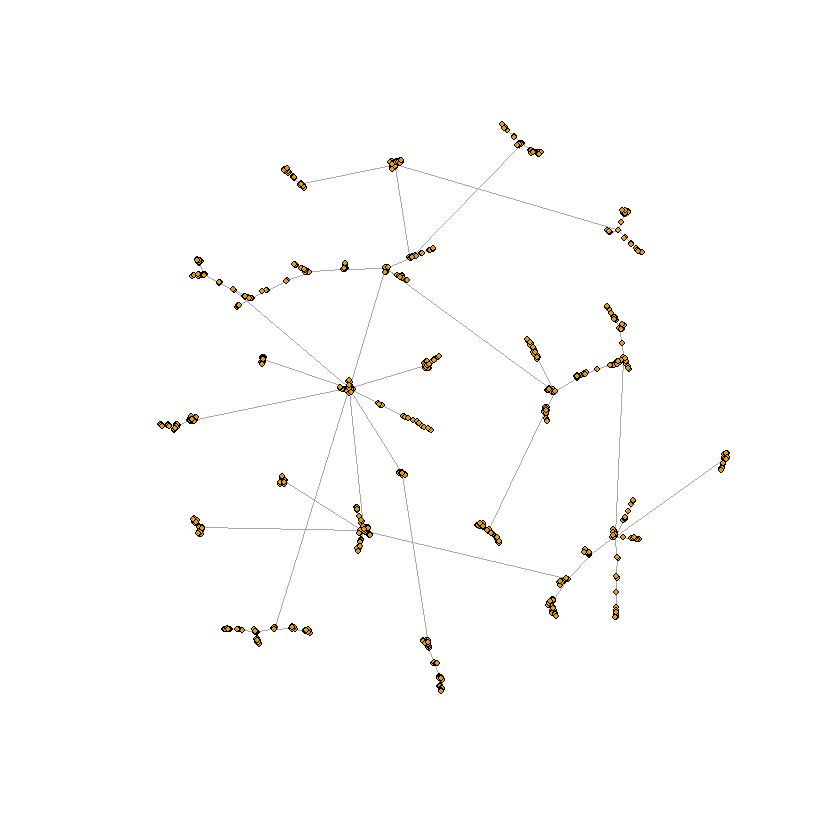

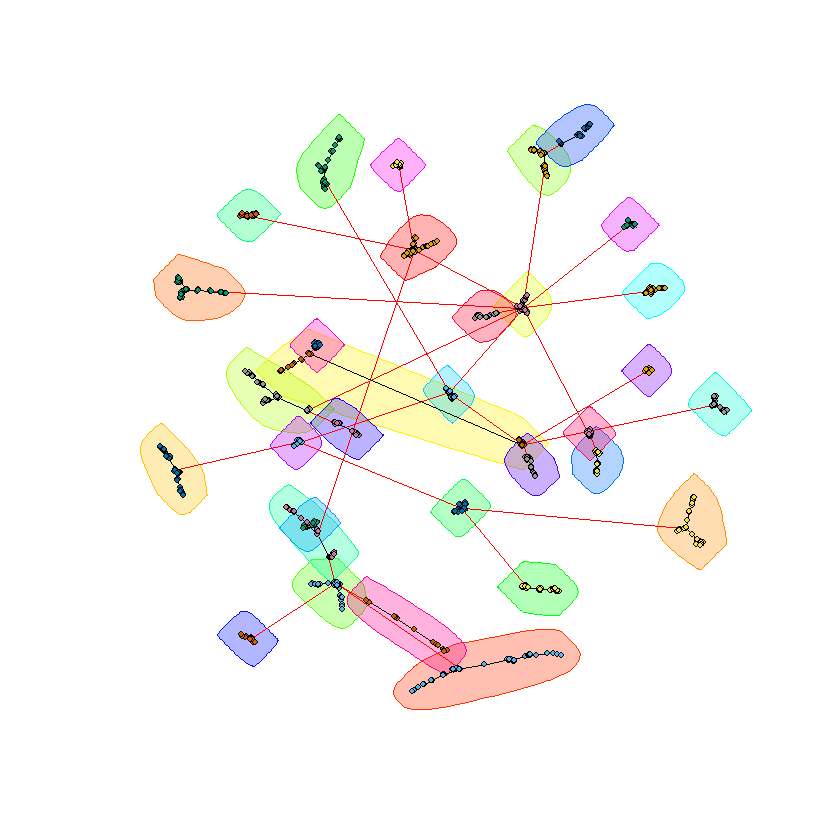

In [18]:
g1 = barabasi.game(n=1000, m=1, directed=FALSE)
degree_seq1 = degree(g1)
g_community = fastgreedy.community(g1)
g_modularity = modularity(g_community)
cat("Origianl graph: ")
cat(paste("\nModularity = ", g_modularity))
plot(g1,vertex.size=2, vertex.label=NA)
plot(g_community, g1, vertex.size=2, vertex.label=NA)

New graph: 
Modularity =  0.841757172588006

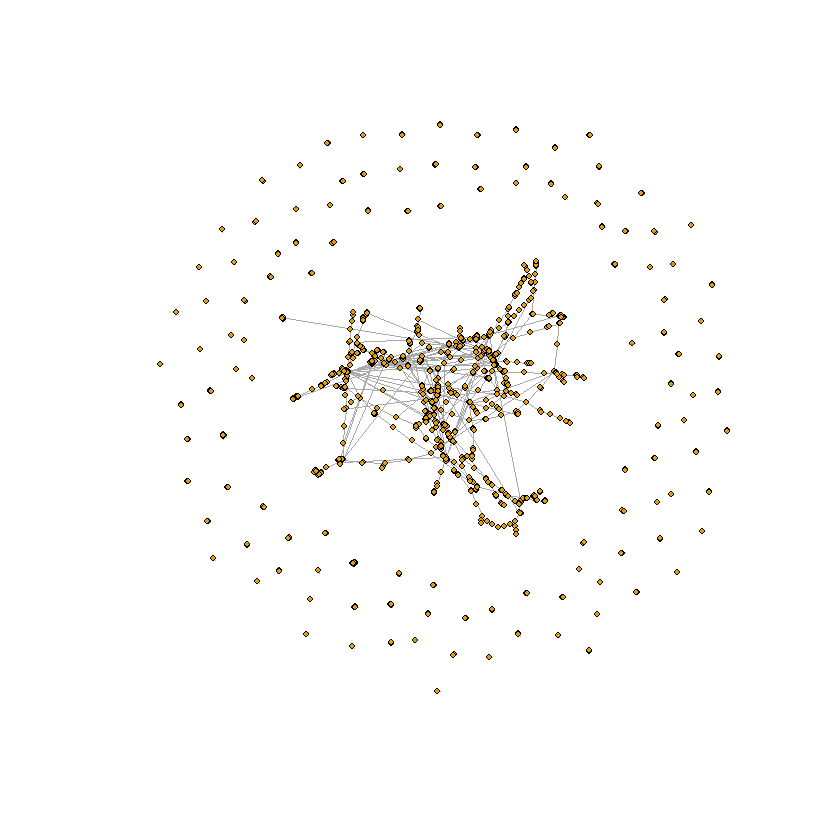

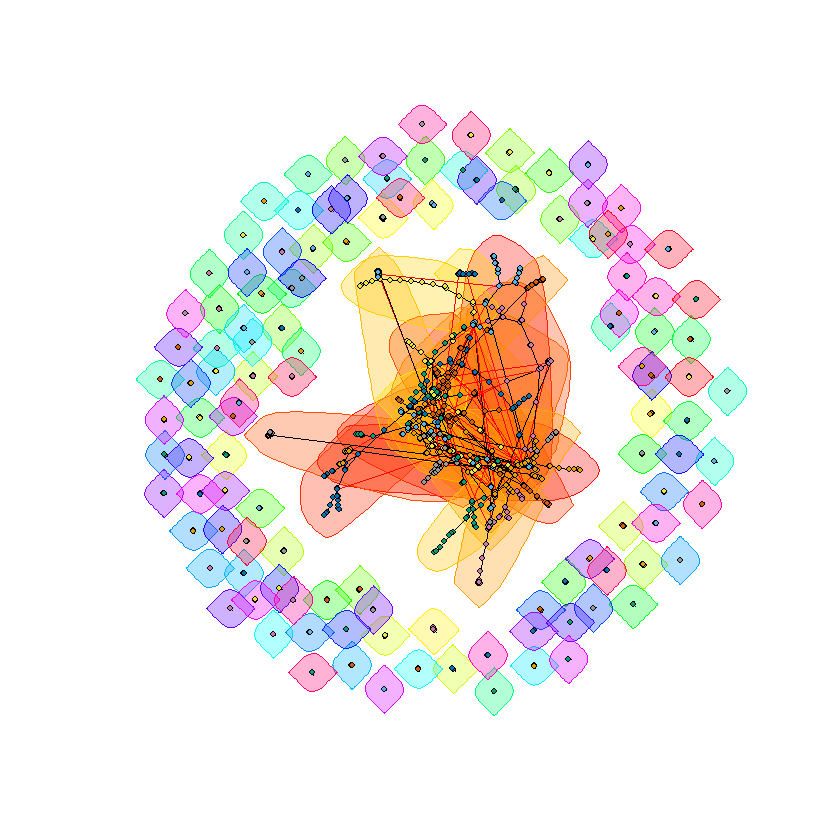

In [19]:
g2 = sample_degseq(degree_seq1, method="simple.no.multiple") 
g_community = fastgreedy.community(g2)

g_modularity = modularity(g_community)
cat("New graph: ")
plot(g2,vertex.size=2, vertex.label=NA)
cat(paste("\nModularity = ", g_modularity))
plot(g_community, g2, vertex.size=2, vertex.label=NA)